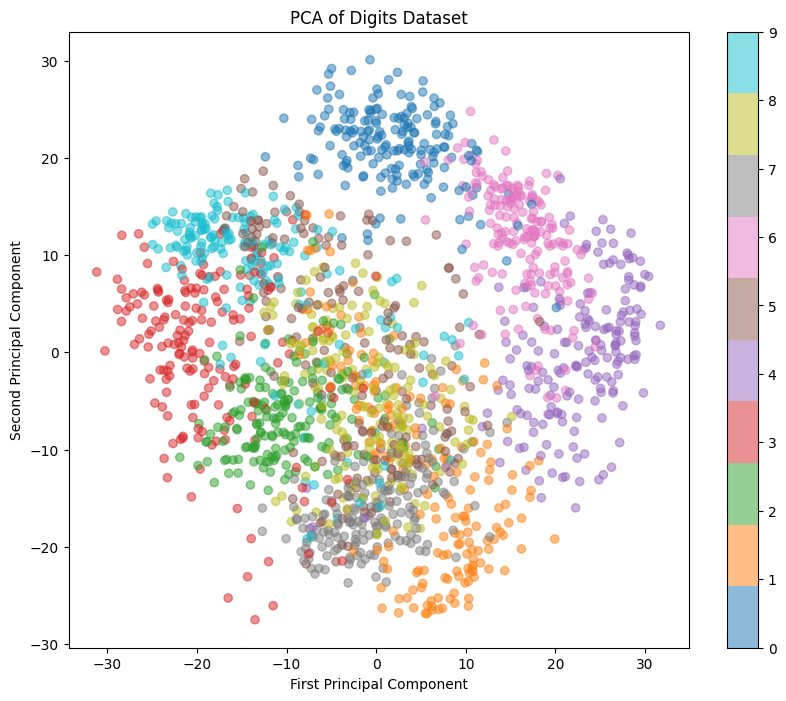

Percentage of variance captured by the first component: 14.89%
Percentage of variance captured by the second component: 13.62%


In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load dataset
DigitData = load_digits()

# Running PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(DigitData.data)

# Plot the first two principal components with the updated colormap method
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=DigitData.target, alpha=0.5, cmap=plt.colormaps['tab10'])
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Digits Dataset')
plt.show()

# Calculate and print the percentage of variance captured by these two components
variance_ratio = pca.explained_variance_ratio_
percentage_variance = variance_ratio * 100
print(f"Percentage of variance captured by the first component: {percentage_variance[0]:.2f}%")
print(f"Percentage of variance captured by the second component: {percentage_variance[1]:.2f}%")

In [ ]:
Task 1:
The code implement the PCA method to the digits dataset to and print out the results by creating a scatter plot for the first 2 principle components.
The percentage of variance captured by the first two components was printed above which is: 28.51%
It is sufficient enough.

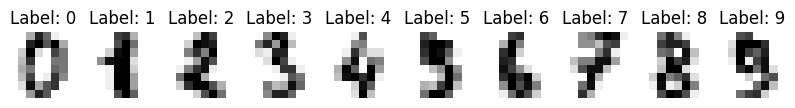

Confusion Matrix:


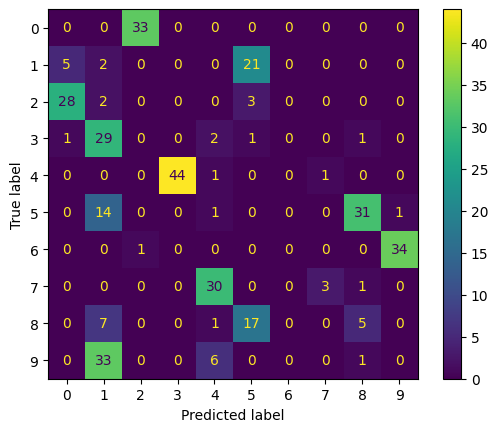

In [7]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Scale the data
data_scaled = scale(DigitData.data)

fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    ax.imshow(DigitData.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Label: {DigitData.target[i]}')
    ax.axis('off')
plt.show()

# Divide the data into a training set and a test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, DigitData.target, test_size=0.2, random_state=42)

# Perform K-Means clustering assuming there are 10 clusters
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(X_train)

# Predict the cluster labels for the test data
y_pred = kmeans.predict(X_test)

# Print a confusion matrix of the test data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Observations:
# We expect the confusion matrix to show some level of mismatch between the cluster labels and actual labels,
# since the clustering is unsupervised and doesn't know the actual labels.

In [ ]:
Task 2:
In this task, after applying the K-means algorithm to the dataset, I can observe that the algorithm is effective in identifying shared visual features among digits and forming clusters based on these similarities.
The confusion matrix of my test has been printed above.